---
title: "Lecture 10: Newton's and interpolation-based methods"
author: "Jamie Haddock"
format: 
    revealjs:
        output-file: Lecture10_slides
        slide-number: true
        chalkboard: 
            buttons: false
        preview-links: auto
        logo: figs/hmc.png
        css: input/slides.css
        incremental: true
        smaller: true
        code-fold: true
    html: 
        code-fold: true
    pdf:
        documentclass: article
        toc: true
        number-sections: true
        geometry:
          - top=1in
          - left=1in
          - bottom=1in
          - right=1in
format-links: false
jupyter: julia-1.9
filters: 
  - input/remove-pause.lua
execute:
  echo: true
  eval: true
---

# Newton's method

Newton's method is one of the most fundamental methods for rootfinding but it also introduces us to some other big ideas in iterative methods -- superlinear convergence!

## Demo

In [29]:
# | echo: false
import Pkg; Pkg.add("Plots")
using Plots

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
⌃ [91a5bcdd] + Plots v1.40.7
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


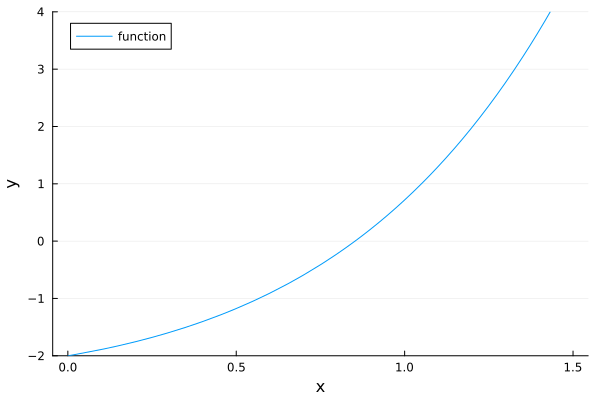

In [30]:
f = x -> x*exp(x) - 2   #function defining the rootfinding problem

plot(f,0,1.5,label="function",grid=:y,ylim=[-2,4],xlabel="x",ylabel="y",legend=:topleft)

. . .

We can see that there is a root near $x = 1$.  This will be our initial guess, $x_1$.

---

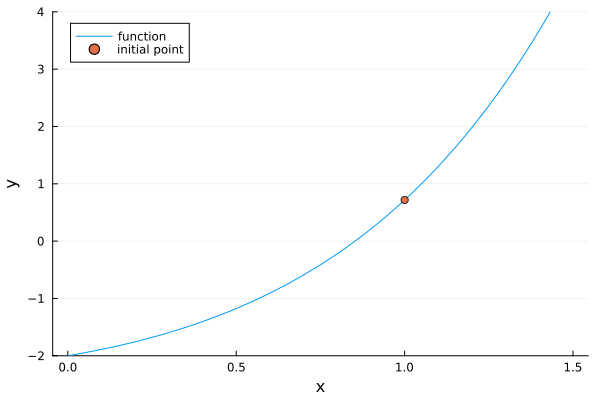

In [31]:
x1 = 1
y1 = f(x1)
scatter!([x1],[y1],label="initial point")

. . .

Next, we compute the tangent line at the point $(x_1, f(x_1))$ using the derivative.

In [32]:
dfdx = x ->exp(x)*(x+1)
m1 = dfdx(x1)
tangent = x -> y1 + m1*(x-x1)

#39 (generic function with 1 method)

---

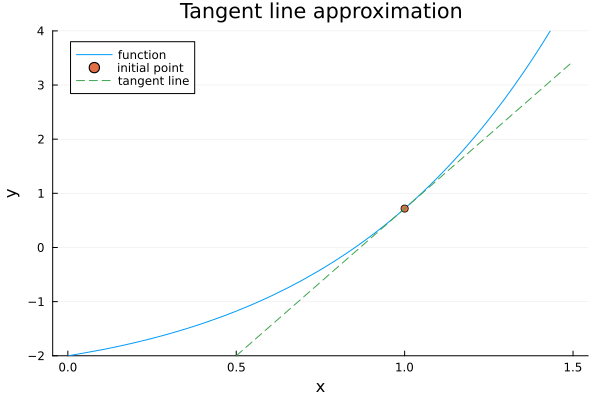

In [33]:
plot!(tangent,0,1.5,l=:dash,label="tangent line", title="Tangent line approximation")

. . .

Rather than finding the root of $f$ itself, we settle for finding the root of the tangent line and let this be our next approximation $x_2$.

---

x2 = x1 - y1 / m1 = 0.8678794411714423


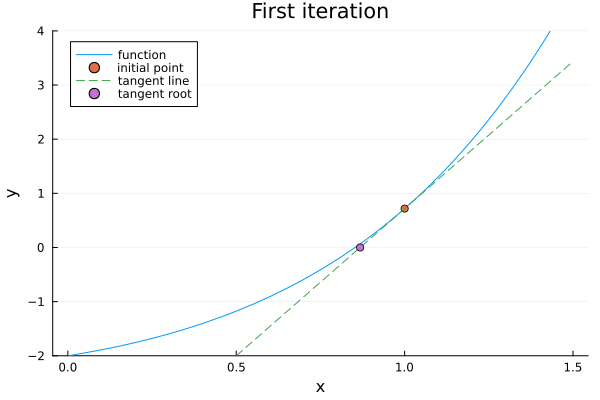

In [34]:
@show x2 = x1 - y1/m1
scatter!([x2],[0],label="tangent root",title="First iteration")

In [35]:
y2 = f(x2)

0.06716266657572145

The residual (i.e., value of $f$ at $x_2$) is smaller than before but not zero.  Thus, we repeat!

---

x3 = x2 - y2 / m2 = 0.8527833734164099


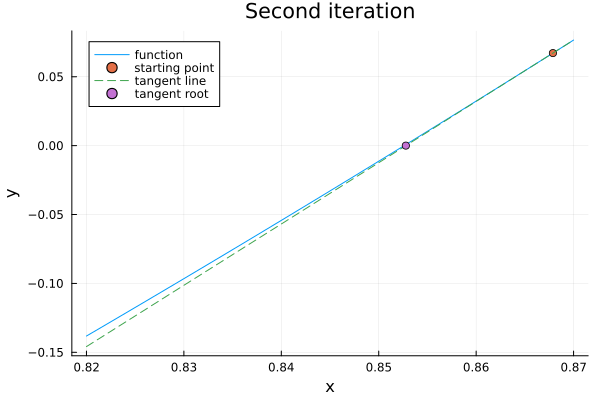

In [36]:
plot(f,0.82,0.87,label="function",legend=:topleft,xlabel="x",ylabel="y",title="Second iteration")
scatter!([x2],[y2],label="starting point")
m2 = dfdx(x2)
tangent = x -> y2 + m2*(x-x2)
plot!(tangent,0.82,0.87,l=:dash,label="tangent line")

@show x3 = x2-y2/m2
scatter!([x3],[0],label="tangent root")

In [37]:
y3 = f(x3)

0.0007730906446230534

The residual is decreasing quickly, so we appear to be getting much closer to the root!

## Newton's method

Given a function $f$, its derivative $f'$, and an initial value $x_1$, iteratively define $$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, \quad\quad k = 1, 2, \cdots.$$

. . .

First, note that this is a special case of the fixed-point iteration!  Define $g(x) = x - \frac{f(x)}{f'(x)}$.  When we identify a root, $x$, where $f(x) = 0$, we have a fixed point of $g$, which is the function defining the Newton update.

. . . 

The previous example also suggests why Newton's method might converge to a root -- as we zoom in on the function $f$, the tangent line and the graph of the differentiable function $f$ must become more and more similar.  However, we don't yet know that it will converge or how quickly!

## Convergence

Assume that the sequence $x_k$ converges to limit $r$ which is a root, $f(r) = 0$.  Define again the error $\epsilon_k = x_k - r$ for $k = 1, 2, \cdots$.  

. . .

We can rewrite the update in terms of the $\epsilon$ sequence as $$\epsilon_{k+1} + r = \epsilon_k + r - \frac{f(r+\epsilon_k)}{f'(r + \epsilon_k)}.$$  Now, note that we know $|\epsilon_k| \rightarrow 0$, so we can use a Taylor expansion of $f$ about $x = r$ to show $$\epsilon_{k+1} = \epsilon_k - \frac{f(r) +\epsilon_k f'(r) + \frac12 \epsilon_k^2f''(r) + O(\epsilon_k^3)}{f'(r) + \epsilon_k f''(r) + O(\epsilon_k^2)}.$$

---

Using that $f(r) = 0$ and dividing through the numerator and denominator by $f'(r)$, we have $$\epsilon_{k+1} = \epsilon_k - \epsilon_k \left[ 1 + \frac12 \frac{f''(r)}{f'(r)}\epsilon_k + O(\epsilon_k^2) \right] \left[ 1 + \frac{f''(r)}{f'(r)}\epsilon_k + O(\epsilon_k^2) \right]^{-1}.$$

. . .

The denominator term is of the form $1/(1+z)$ and provided $|z| < 1$, this is the limit of $1 - z + z^2 - z^3 + \cdots$.  Cutting terms off at the quadratic term we have $$\epsilon_{k+1} = \epsilon_k - \epsilon_k \left[ 1 + \frac12 \frac{f''(r)}{f'(r)}\epsilon_k + O(\epsilon_k^2) \right] \left[ 1 - \frac12 \frac{f''(r)}{f'(r)}\epsilon_k + O(\epsilon_k^2) \right] = \frac12 \frac{f''(r)}{f'(r)}\epsilon_k^2 + O(\epsilon_k^3).$$

. . .

::: {.callout-warning icon=false}
## Fact: 
Asymptotically, each iteration of Newton's method roughly squares the error.
:::

---

::: {.callout-note icon=false}
## Definition: Quadratic convergence
Suppose a sequence $x_k$ approaches a limit $x^*$.  If the error $\epsilon_k = x_k - x^*$ satisfies $$\lim_{k\rightarrow \infty} \frac{|\epsilon_{k+1}|}{|\epsilon_k|^2} = L$$ for a positive constant $L$, then the sequence has **quadratic convergence** to the limit.
:::

. . .

Quadratic convergence is an example of *superlinear convergence*.

. . .

::: {.callout-warning icon=false}
## Fact: 
While practically linear convergence trends towards a straight line on a log-linear plot of the error, when the convergence is quadratic, no such straight line exists -- the convergence keeps getting steeper. 
:::

---

In [38]:
f = x -> x*exp(x) - 2;
dfdx = x -> exp(x)*(x+1);

In [39]:
# | echo: false

import Pkg; Pkg.add("NLsolve")
using NLsolve

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [40]:
r = nlsolve(x -> f(x[1]),[1.]).zero   #calculate a proxy for the exact root

1-element Vector{Float64}:
 0.852605502013726

In [41]:
x = [1; zeros(4)]  #use 1 as our starting point
for k = 1:4
    x[k+1] = x[k] - f(x[k]) / dfdx(x[k])
end
x

5-element Vector{Float64}:
 1.0
 0.8678794411714423
 0.8527833734164099
 0.8526055263689221
 0.852605502013726

In [42]:
eps = @. x - r

5-element Vector{Float64}:
 0.14739449798627402
 0.015273939157716354
 0.00017787140268388235
 2.435519608212644e-8
 0.0

---

The error reaches $\epsilon_{\text{mach}}$ quickly, so we use extended precision (and software emulation arithmetic) to do the calculations for a few more iterations.

In [43]:
x = [BigFloat(1);zeros(7)]        #a BigFloat uses 256 bits of precision, but arithmetic is *much* slower!
for k = 1:7
    x[k+1] = x[k] - f(x[k]) / dfdx(x[k])
end
r = x[end]

0.8526055020137254913464724146953174668984533001514035087721073946525150656742605

In [44]:
eps = @. Float64(x[1:end-1]-r)

7-element Vector{Float64}:
 0.14739449798627452
 0.01527393915771683
 0.00017787140268443004
 2.435519656311045e-8
 4.56680051680793e-16
 1.6056572825272187e-31
 1.9848810119594387e-62

---

In [45]:
logerr = @. log(abs(eps))
[ logerr[i+1]/logerr[i] for i in 1:length(logerr)-1 ]

6-element Vector{Float64}:
 2.184014482339964
 2.0648638810676476
 2.0302996897413403
 2.014917265833641
 2.007403413131773
 2.003688054470438

The above convergence to 2 constitutes good evidence of quadratic convergence!

. . .

::: {.callout-warning icon=false}
## Fact: 
In our derivations above, we have made some assumptions -- these are requirements for $f$:

1. Function $f$ needs to be sufficiently *smooth* to make the Taylor series expansion valid.
2. We require $f'(r) \not= 0$, meaning $r$ must be a simple root.
3. We assumed that the sequence converged which is not guaranteed.  In fact it is often hard to identify a starting point from which Newton's method converges!
:::

---

In [46]:
"""
    newton(f,dfdx,x1[;maxiter,ftol,xtol])

Use Newton's method to find a root of 'f' starting from 'x1', where 'dfdx' is the derivative of 'f'.  
Returns a vector of root estimates.

The optional keyword parameters set the maximum number of iterations and the stopping tolerance for 
    values of 'f' and changes in 'x'.
"""
function newton(f,dfdx,x1;maxiter=40,ftol=100*eps(),xtol=100*eps())   
    # maxiter, ftol, and xtol are keyword parameters
    # the default values are given but others may be entered by a user
    x = [float(x1)]
    y = f(x1)
    delx = Inf
    k = 1

    while (abs(delx) > xtol) && (abs(y) > ftol)
        dydx = dfdx(x[k])
        delx = -y/dydx                # Newton step
        push!(x,x[k]+delx)            # append iterate

        k += 1
        y = f(x[k])
        if k==maxiter
            @warn "Maximum number of iterations reached."
            break    # exit loop
        end
    end
    return x
end

newton

. . .

We use three stopping criterions here:

1. If $|x_{k+1} - x_k| < \texttt{xtol}$ (the update distance gets sufficiently small) we stop.  This value is used as a proxy for the unknown error $|x_k - r|$.
2. If the residual $|f(x_k)| < \texttt{ftol}$ (the backward error is sufficiently small) we stop.  This is more realistic to control for badly conditioned problems.
3. We protect against a nonconvergent iteration with a bound on the total number of iterations, $\texttt{maxiter}$.

<!--
[verbose test]{.content-hidden when-format="revealjs" when-format="pptx"}

::: {.callout-caution icon=false}
## Exercise: 

:::

<details><summary>Answer:</summary> </details>


::: {.callout-note icon=false}
## Definition: 
 
:::


::: {.callout-tip icon=false}
## Note: 
 
:::
-->

# Interpolation-based methods

One of the biggest challenges to use Newton's method is that you must provide (or approximate) $f'$.  However, the following observation yields a way to avoid this drawback!

. . .

::: {.callout-warning icon=false}
## Fact: 
When a step produces an approximate result, you are free to carry it out approximately.
:::

---

In [47]:
# | echo: false

using Plots

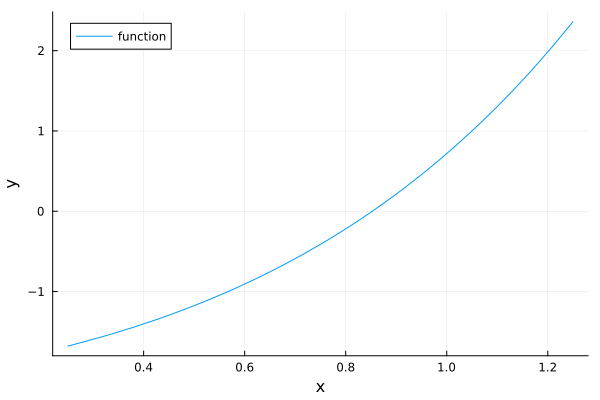

In [48]:
f = x -> x*exp(x) - 2;

plot(f,0.25,1.25,label="function",xlabel="x",ylabel="y",legend=:topleft)

---

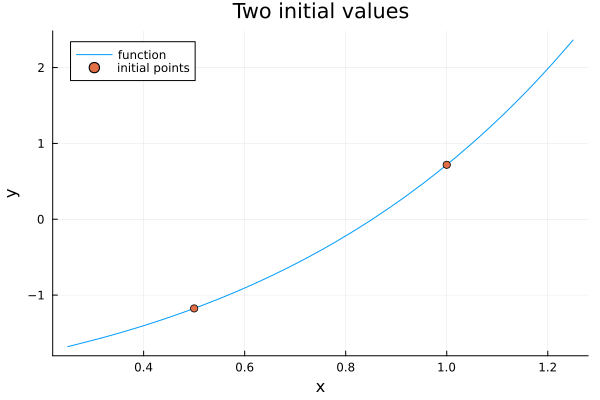

In [49]:
x1 = 1; y1 = f(x1);
x2 = 0.5; y2 = f(x2);
scatter!([x1, x2],[y1, y2], label="initial points", title="Two initial values")

. . .

Instead of using the tangent line, we can use the *secant line*!

---

y3 = f(x3) = -0.17768144843679456


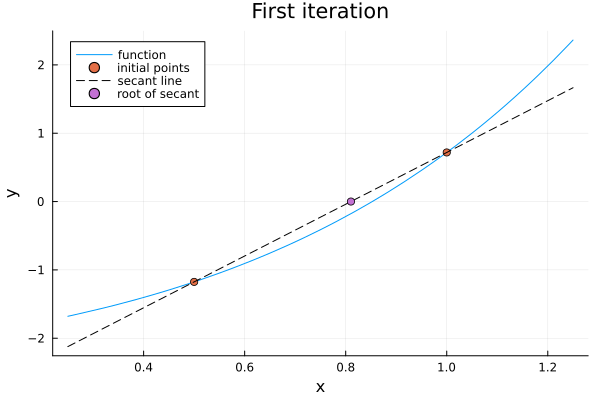

In [50]:
m2 = (y2-y1)/(x2-x1)
secantline = x -> y2 + m2*(x-x2)
plot!(secantline,0.25,1.25,label="secant line",l=:dash,color=:black)

x3 = x2 - y2/m2
@show y3 = f(x3)
scatter!([x3],[0],label="root of secant", title="First iteration")

. . .

For the next iteration, we use the line through the two most recent points.

In [51]:
m3 = (y3-y2)/(x3-x2)
x4 = x3 - y3/m3

0.8656319273409482

---

This is the **secant method**!  Given function $f$ and two initial values $x_1$ and $x_2$, define $$x_{k+1} = x_k - \frac{f(x_k)(x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}, \quad\quad k = 2, 3, \cdots.$$

. . .

In [52]:
"""
    secantmethod(f,x1,x2[;maxiter,ftol,xtol])

Use the secant method to find a root of 'f' starting from 'x1' and 'x2'.
Returns a vector of root estimates.
"""
function secantmethod(f,x1,x2;maxiter=40,ftol=100*eps(),xtol=100*eps())
    x = [float(x1),float(x2)]
    y1 = f(x1)
    delx, y2 = Inf, Inf
    k = 2

    while (abs(delx) > xtol) && (abs(y2) > ftol)
        y2 = f(x[k])
        delx = -y2 * (x[k]-x[k-1]) / (y2-y1)    # secant step
        push!(x,x[k]+delx)                      # append new estimate

        k += 1
        y1 = y2

        if k==maxiter
            @warn "Maximum number of iterations reached."
            break     # exit loop
        end
    end
    return x
end

secantmethod

## Convergence

An annoying Taylor series expansion calculation like we did for Newton's method show that, for the errors for the secant method, $$\epsilon_{k+1} = \frac12 \frac{f''(r)}{f'(r)} \epsilon_k \epsilon_{k-1}.$$

. . .

Guessing that $\epsilon_{k+1} = c(\epsilon_k)^\alpha$, the above equation is $$[\epsilon_{k-1}^\alpha]^\alpha \approx C \epsilon_{k-1}^{\alpha + 1}$$ and thus we must have $\alpha^2 = \alpha + 1$ which has positive solution $$\alpha = \frac{1 + \sqrt{5}}{2} \approx 1.618.$$  

---

::: {.callout-note icon=false}
## Definition: Superlinear convergence
Suppose a sequence $x_k$ approaches limit $x^*$.  If the error sequence $\epsilon_k = x_k - x^*$ satisfies $$\lim_{k \rightarrow \infty} \frac{|\epsilon_{k+1}|}{|\epsilon_k|^\alpha} = L$$ for constants $\alpha > 1$ and $L > 0$, then the sequence has **superlinear convergence** with rate $\alpha$.
:::

. . .

In [53]:
f = x -> x*exp(x) - 2
x = secantmethod(f,BigFloat(1),BigFloat(0.5),xtol=1e-80,ftol=1e-80);

In [54]:
r = x[end]

0.8526055020137254913464724146953174668984533001514035087721073946525150656742605

---

In [55]:
eps = @. Float64(r - x[1:end-1])

12-element Vector{Float64}:
 -0.14739449798627452
  0.3526055020137255
  0.04223372706144885
 -0.013026425327222755
  0.00042747994131549927
  4.269915586133851e-6
 -1.4054770126368277e-9
  4.620323656624992e-15
  4.999480931132388e-24
 -1.7783862252641536e-38
  6.845099610444838e-62
  0.0

In [56]:
[ log(abs(eps[k+1]))/log(abs(eps[k])) for k in 1:length(eps)-1 ]

11-element Vector{Float64}:
  0.5444386280277932
  3.0358017547194556
  1.3716940021941466
  1.7871469297607543
  1.5937804750546951
  1.6485786749732587
  1.6194128077496301
  1.6254302470561015
  1.6200958015239788
  1.6202559600872728
 Inf

---

::: {.callout-warning icon=false}
## Fact: 
If function evaluations are used to measure computational work, the secant iteration converges more rapidly than Newton's method.
:::

[Each iteration of the secant method needs only one *new* function evaluation of $f$, while Newton's method requires a new function evaluation of $f$ and $f'$.  Thus, for every two function evaluations, Newton's method squares the error, while the secant method raises the error to a power of approximately $3.236$.]{.content-hidden when-format='revealjs' when-format='pptx'} 

. . .

There are two additional ideas used to strengthen the type of method we've studied in this lecture.

1. Use more than two points and other functional (other than linear) or polynomial interpolants of the points whose root defines the next approximation.  These are sometimes called **interpolation** or **inverse interpolation** methods.
2. Use only sets of points that are known to **bracket** the root to avoid any possibility of divergence.  This is the idea behind **Brent's method** which is a very powerful rootfinding method.